In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [175]:
df= pd.read_csv("Customer Churn.csv")

In [176]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [180]:
#replacing blanks with 0 as tenure is 0 and no total charges are recorded 

In [181]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [184]:
#Check null values in Data

In [185]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [186]:
#Check duplicate values in data according to entire column and specific column

In [187]:
df.duplicated().sum()   #Check according to entire column

0

In [188]:
df.duplicated().sum()   #Check according to entire column 

0

In [189]:
df["customerID"].duplicated().sum()

0

In [190]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)

In [191]:
#converted 0 and 1 values of senior citizen to yes/no to make it easir to understand 

In [192]:
#Cleaning and inpection of data is done lest start the analysis

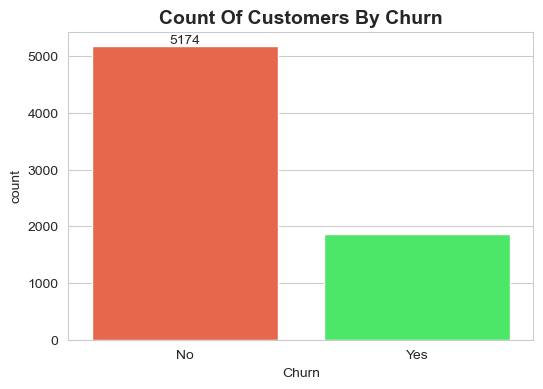

In [193]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Churn', hue='Churn', data=df, palette=["#FF5733", "#33FF57"], legend=False)
ax.bar_label(ax.containers[0])
plt.title("Count Of Customers By Churn", fontsize=14, fontweight='bold')
plt.show()

Text(0.5, 1.0, 'Percentage of Churned Customers')

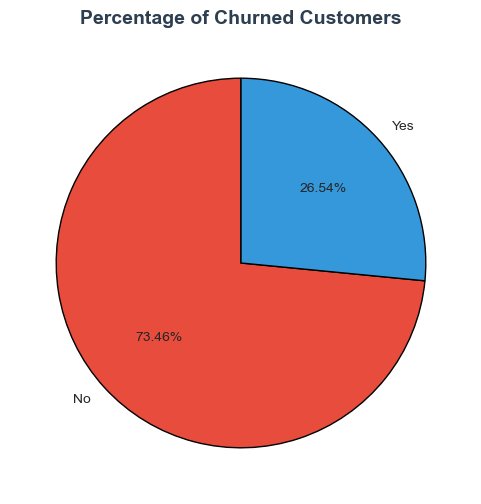

In [204]:
# Grouping the dataframe by 'Churn' column and counting the number of occurrences in each category
colors = ['#E74C3C', '#3498DB']  

gb = df.groupby("Churn").agg({'Churn': "count"})

plt.figure(figsize=(6, 6))
plt.pie(gb['Churn'], labels=gb.index, autopct="%1.2f%%", colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})

plt.title("Percentage of Churned Customers", fontsize=14, fontweight='bold', color='#2C3E50')


#From the given pie chart we can conclude that 26.54% of our customers have churned out 
#not let's explore the reason behind it 

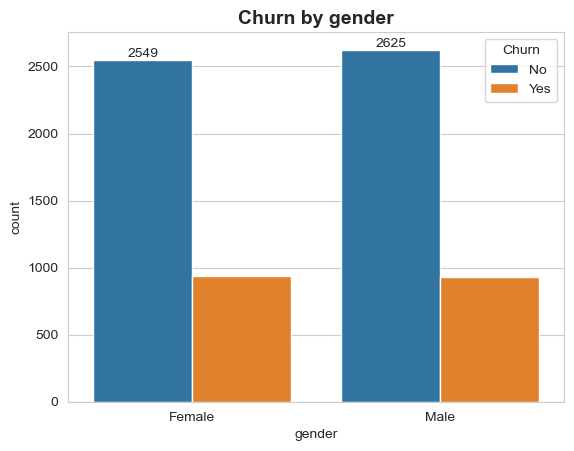

<Figure size 600x500 with 0 Axes>

In [195]:
yx=sns.countplot(x='gender', data=df, hue='Churn')
yx.bar_label(yx.containers[0])
plt.title("Churn by gender", fontsize=14, fontweight='bold')
plt.figure(figsize=(6,5))
plt.show()

<Figure size 600x500 with 0 Axes>

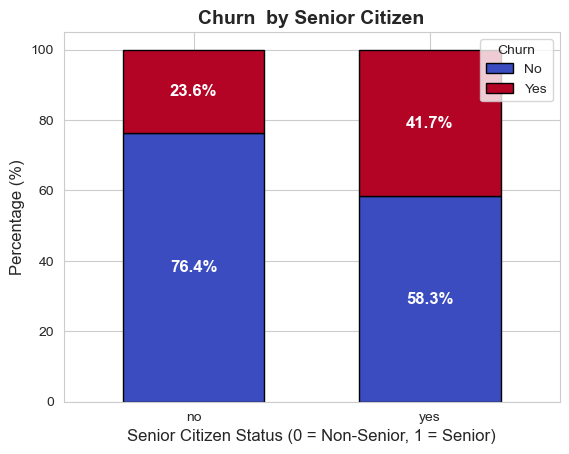

In [196]:
# Calculate count of Churn within each SeniorCitizen category
grouped = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()

# Convert to percentage of total
grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100  

# Plot stacked bar chart
plt.figure(figsize=(6,5))
ax = grouped_percentage.plot(kind='bar', stacked=True, colormap="coolwarm", edgecolor="black", width=0.6)

# Add percentage labels inside the bars
for index, (total, row) in enumerate(zip(grouped.sum(axis=1), grouped_percentage.values)):
    for i, value in enumerate(row):
        plt.text(index, sum(row[:i + 1]) - (value / 2), f"{value:.1f}%", 
                 ha='center', va='center', fontsize=12, color='white', fontweight='bold')

# Customizing title and labels
plt.title("Churn  by Senior Citizen", fontsize=14, fontweight='bold')
plt.xlabel("Senior Citizen Status (0 = Non-Senior, 1 = Senior)", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(title="Churn", labels=["No", "Yes"], loc="upper right")

# Show the plot
plt.show()

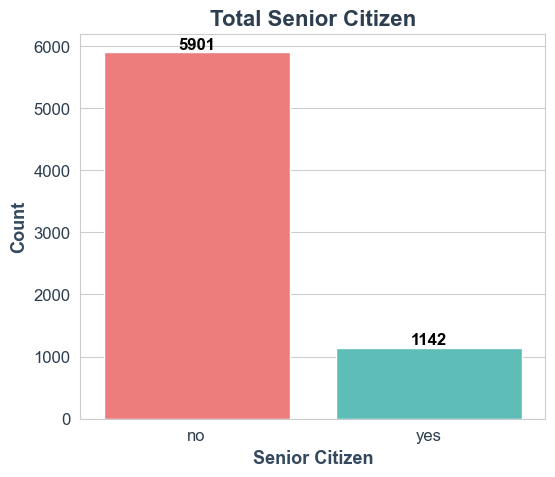

In [197]:

colors = ['#FF6B6B', '#4ECDC4']  

plt.figure(figsize=(6, 5))

ax = sns.countplot(x='SeniorCitizen', data=df, hue='SeniorCitizen', palette=colors, legend=False)

# Add labels on bars
for container in ax.containers:
    ax.bar_label(container,  label_type='edge',  fontsize=12, color='black', fontweight='bold')

# Remove all borders (spines)

# Customizing title and labels
plt.title("Total Senior Citizen", fontsize=16, fontweight='bold', color='#2C3E50')  
plt.xlabel("Senior Citizen", fontsize=13, fontweight='bold', color='#34495E')  
plt.ylabel("Count", fontsize=13, fontweight='bold', color='#34495E')

# Customize ticks
ax.tick_params(axis='x', labelsize=12, labelcolor='#2C3E50')
ax.tick_params(axis='y', labelsize=12, labelcolor='#2C3E50')

plt.show()


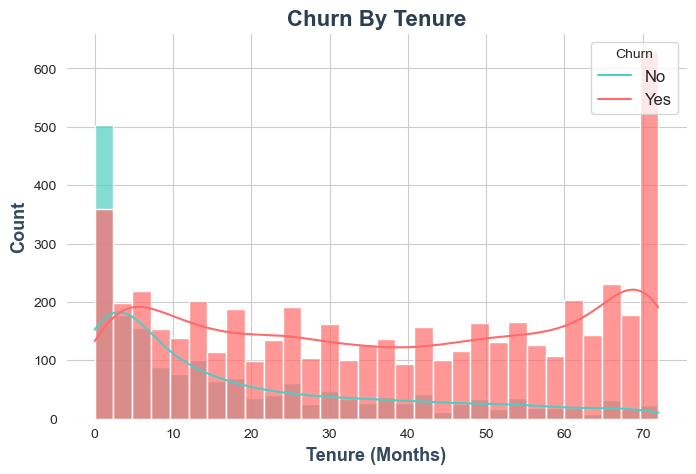

In [198]:


# Set style
sns.set_style("whitegrid")

# Define custom colors
colors = ['#FF6B6B', '#4ECDC4']  # Red & Teal

plt.figure(figsize=(8, 5))

# Create histogram with better styling
ax = sns.histplot(x='tenure', data=df, hue='Churn', palette=colors, alpha=0.7, bins=30, kde=True, edgecolor=None)

# Customizing title and labels
plt.title("Churn By Tenure", fontsize=16, fontweight='bold', color='#2C3E50')
plt.xlabel("Tenure (Months)", fontsize=13, fontweight='bold', color='#34495E')
plt.ylabel("Count", fontsize=13, fontweight='bold', color='#34495E')

# Improve legend placement
plt.legend(title="Churn", labels=["No", "Yes"], loc="upper right", fontsize=12)

# Remove all unnecessary borders
sns.despine(left=True, bottom=True)

# Show plot
plt.show()


#people who have used for our services for a long time have stayed and peple who have used our Services in short time Have churned

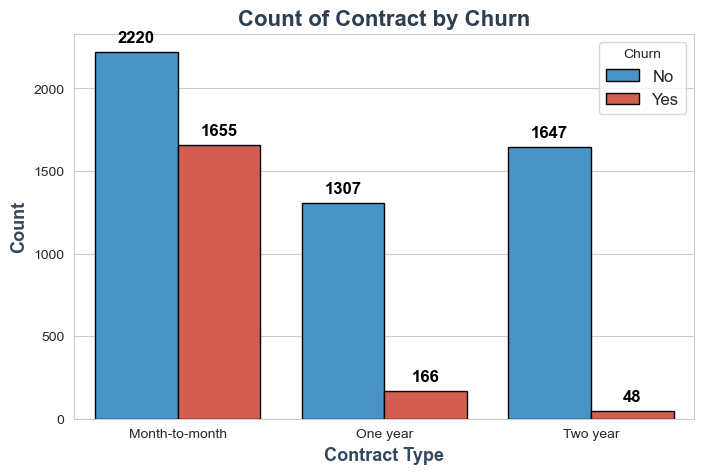

In [199]:

sns.set_style("whitegrid")
colors = ['#3498DB', '#E74C3C']  
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Contract', hue='Churn', data=df, palette=colors, edgecolor='black')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=5, fontsize=12, color='black', fontweight='bold')
    
plt.title("Count of Contract by Churn", fontsize=16, fontweight='bold', color='#2C3E50')
plt.xlabel("Contract Type", fontsize=13, fontweight='bold', color='#34495E')
plt.ylabel("Count", fontsize=13, fontweight='bold', color='#34495E')
plt.legend(title="Churn", labels=["No", "Yes"], loc="upper right", fontsize=12)
plt.show()


#people who have month to month contract are likely to churn then from those who have 1 or 2 years or contract. 

In [200]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

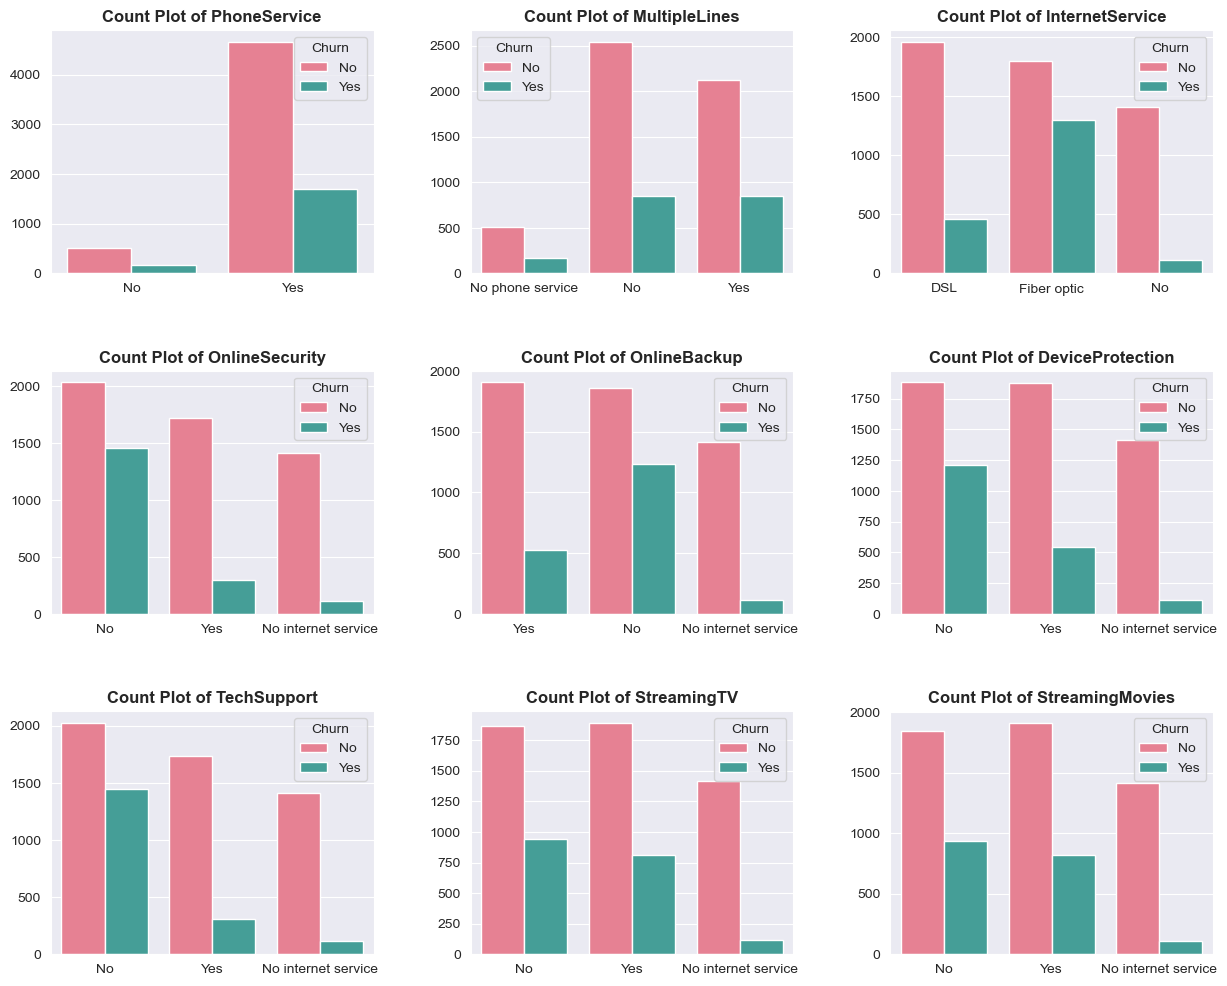

In [202]:
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  

sns.set_style("darkgrid")
palette = sns.color_palette("husl", 2)  # Ensuring only two colors for hue

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue=df["Churn"], palette=palette)
    axes[i].set_title(f'Count Plot of {col}', fontsize=12, fontweight='bold')

    axes[i].set_ylabel('', fontsize=10)
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

#The majority of customers who do not churn tend to have services like PhoneService, InternetService (particularly DSL), and OnlineSecurity enabled. For services like OnlineBackup, TechSupport, and StreamingTV, churn rates are noticeably higher when these services are not used or are unavailable. 

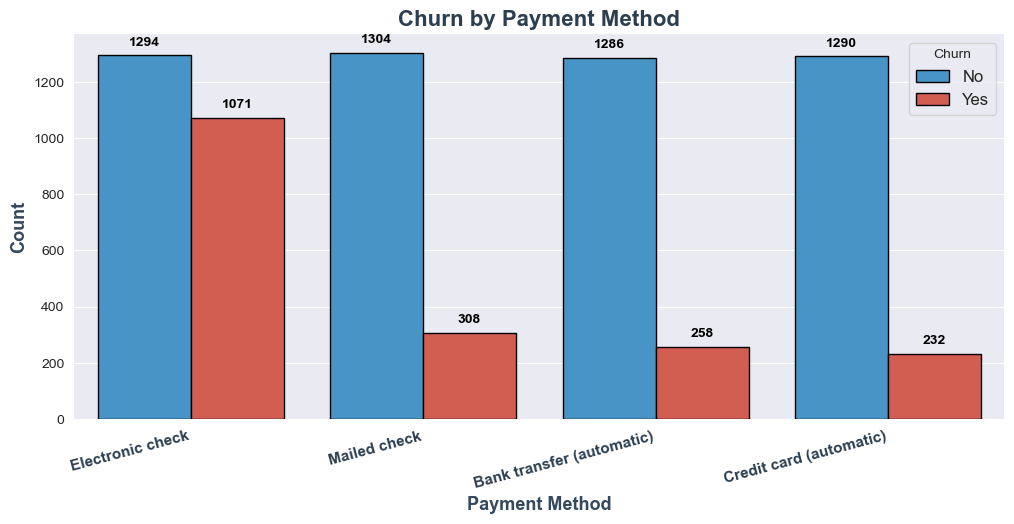

In [203]:
colors = ['#3498DB', '#E74C3C']

plt.figure(figsize=(12, 5))

ax = sns.countplot(x='PaymentMethod', data=df, hue='Churn', palette=colors, edgecolor='black')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=5, fontsize=10, color='black', fontweight='bold')
plt.title("Churn by Payment Method", fontsize=16, fontweight='bold', color='#2C3E50')
plt.legend(title="Churn", labels=["No", "Yes"], loc="upper right", fontsize=12)
plt.xlabel("Payment Method", fontsize=13, fontweight='bold', color='#34495E')
plt.ylabel("Count", fontsize=13, fontweight='bold', color='#34495E')

plt.xticks( rotation=15,ha='right', fontsize=11, color='#2C3E50', fontweight='bold')
sns.despine(left=True, bottom=True)
plt.show()

#Customer is likely to churn when he is using electronic check as a payment method